In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib2tikz import save as tikz_save


In [4]:
cd ~/HPT_500k/

/mnt/drive2/re_500k


In [5]:
import planes

In [6]:
domain=planes.plane()
domain.read_data('HPT_LS05_DOM30_TI5/case_sel/STAT_cont','HPT_LS05_DOM30_TI5/cascade3d.in')

HPT_LS05_DOM30_TI5/case_sel/STAT_cont
Reading file in CGNS format


# Extract variables

Next a list on variables to extract from the STAT* file has to be specfied. A full list of variables can be obtained from the <a href="https://hipstar-code.org/index.php?title=HiPSTAR/Code/new_statistics#Postprocessing_of_Statistics">  wiki</a>. Some base variables are provided in the table below for quick acces. Variables are classed in groups (101,102,...) and an index that start from one within each group. In general datasets might be large so it might be better to only load the variables that you want to plot.

### Favre averaged statistics -101
| variable      |   id  |
|:------------- | -----:|
| <math> \overline{\rho} </math> | 1 
| <math> \widetilde{u}_1 </math> | 2 
| <math> \widetilde{u}_2 </math> | 3 
| <math> \widetilde{T} </math> | 4 
| <math> \overline{p} </math> | 5
| <math> \frac{\overline{\mu}}{\text{Re}_\infty} </math> | 6
| <math> \sqrt{\overline{\rho^{'2}}} </math> | 7
| <math> \sqrt{\widetilde{T^{''2}}} </math> | 8
| <math> \sqrt{\overline{p^{'2}}}</math> | 9
| <math> \tau_{11} </math> | 10
| <math> \tau_{12} </math> | 11
| <math> \tau_{22} </math> | 12
| <math> \tau_{33} </math> | 13
| <math> \tau_{13}=0 </math> | 14
| <math> \tau_{23}=0 </math> | 15
| <math> \widetilde{u}_3 =0 </math> | 16


In [7]:
indices=[]
print "%15s %15s"%("variable","index")
for i in range(5):
    indices.append(domain.var.get_index(101,i+1))
    print "%15s %15i"%(domain.var.vars[indices[i]],i)
domain.extr_plane(indices)

       variable           index
$ \overline{\rho}$               0
$ \widetilde{u_1}$               1
$ \widetilde{u_2}$               2
$ \widetilde{T}$               3
$ \overline{p}$               4


The list created by the previous cell gives the index to be used for the plotting in the next cell

<IPython.core.display.Javascript object>


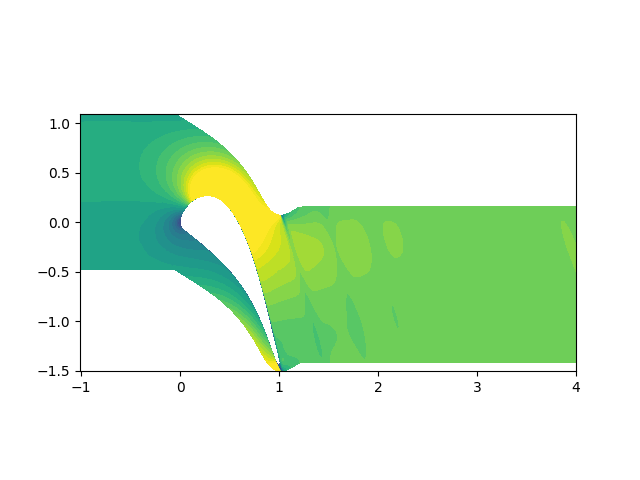

In [8]:
#specify levels min,max number of contours
levs=np.linspace(-0.5,2.0,num=26)
plt.figure()
plt.axes(aspect=1.)
for ib in range(9):
    plt.contourf(domain.grid[ib][:,:,0],domain.grid[ib][:,:,1],domain.field[ib][:,:,1],levels=levs
                ,extend='max')

In [9]:
## to get more information on other parameters for th contour plots uncomment the following line and execute this cell
#plt.contourf?